# Data Mining Assignment

Using a futuristic telescope, ISRO gathered data of nebulas that are several lights years away from earth. With some analysis this data is mapped into two dimensional data (file galaxy.xlsx provided with this document). ISRO's scientific probe is converging to a point that shows the formation of five possible star coagulations from these nebulas. As a data scientist you are expected to help ISRO to analyze their data further. Answer the following questions. 

1.	Find out the values of DBSCAN parameters (mathematically supported) that prove the hypotheses of ISRO scientists.<br> answers: ϵ=0.15  and min_samples=4, the solution is available in cells from cell-6 to cell-13
	
2.	How many total outliers and elements are there in each density region?
<br> Total number of outliers: 29
<br>For cluster 0, the number of members are 411
<br>For cluster 1, the number of members are 405
<br>For cluster 2, the number of members are 105
<br>For cluster 3, the number of members are 99
<br>For cluster 4, the number of members are 51
<br>The way how it is calculated is shown in  cell-13 to cell-15
<br>
3.	Which one of the dimensions has few outliers if you analyse the data from simple quantile perspective? What are their values? *<br>Answers are calculated from cells cell-3 to cell-5*

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("./galaxy.xlsx")

## Calculating Statistical Description(5-number data)

In [3]:
df.describe()

,x,y
count,1100.000000,1100.000000
mean,-0.081222,-0.625431
std,0.644967,1.176170
min,-1.489180,-3.353462
25%,-0.478839,-1.126752
50%,-0.132920,-0.297040
75%,0.366072,0.250817
max,1.492208,1.253874


In [4]:
stat_df = df.describe()

 ## Finding outlier using simple quantile
 
 

The $3^{rd}$ and $1^{st}$ quantile values are calculated as $Q3$ and $Q1$ respectively. 

The Inter-Quartile value can be calculated as <br>
$ IQR = Q3 - Q1 $

The maximum and minimum threshold value, $low\_cap\_x$ and $high\_cap\_x$ for $x$, $low\_cap\_y$ and $high\_cap\_y$ for $y$ respectively, for the given data distribution, preceeding or exceeding values are henceforth outliers, these values are calculated for each dimension of data, $x$ and $y$ for the current dataset, using the follwing:<br>
$low\_cap\_x = Q1 - 1.5 * IQR\_x$<br>
$high\_cap\_x = Q3 + 1.5 * IQR\_x$<br>
$low\_cap\_y = Q1 - 1.5 * IQR\_y$<br>
$high\_cap\_y = Q3 + 1.5 * IQR\_y$<br>

In [5]:
# Initializing the quanrtile variables
q1_x = stat_df['x'][4]
q1_y = stat_df['y'][4]
q3_x = stat_df['x'][6]
q3_y = stat_df['y'][6]

# Computing IQR values, for x and y respectively
iqr_x = q3_x - q1_x
iqr_y = q3_y - q1_y

# Computing the max_cap and min_cap values, for x and y respectively
low_cap_x = q1_x - 1.5 * iqr_x
high_cap_x = q3_x + 1.5 * iqr_x
low_cap_y = q1_y - 1.5 * iqr_y
high_cap_y = q3_y + 1.5 * iqr_y

# Calculating number of outliers and outliers, for x and y respectively
outlier_x = df[(df.x>high_cap_x) | (df.x<low_cap_x)]['x']
outlier_y = df[(df.y>high_cap_y) | (df.y<low_cap_y)]['y']

print("Total number of outliers, for x: {}".format(outlier_x.count()))
print("Total number of outliers, for y: {}".format(outlier_y.count()))

if outlier_x.count():
    print("Outliers of x are: [{}]".format(", ".join(outlier_x.astype(str).values.tolist())))
if outlier_y.count():
    print("Outliers of y are: {}".format(", ".join(outlier_y.astype(str).values.tolist())))

Total number of outliers, for x: 0
Total number of outliers, for y: 3
Outliers of y are: -3.23179375708166, -3.24834193589759, -3.35346215533992


## Visualizing the dataset

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'], alpha=0.5)
plt.show()

<Figure size 640x480 with 1 Axes>

## DBSCAN

We need to estimate 2 parameters for DBSCAN algorithm <br>
1. $\epsilon$: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value ($\epsilon$), these points are considered neighbors. <br>
2. min_samples: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region

## Calculate min_samples
By referring to paper A Density-Based Algorithm for Discovering Clusters
in Large Spatial Databases with Noise, Auhored by Martin Ester, Hans-Peter Kriegel, Jörg Sander, Xiaowei X<br>
For two-dimensional data: use default value of min_samples=4 (Ester et al., 1996)<br>
For more than 2 dimensions: min_samples=2*dim (Sander et al., 1998) where dim is dimension of the dataset

## Calculate $\epsilon$
To calculate the $\epsilon$, We will use the Elbow(or knee) method<br> 
The idea is to calculate, the average of the distances of every point to its k nearest neighbors. The value of k will be specified by the user and corresponds to min_samples.

Next, these k-distances are plotted in an ascending order. The aim is to determine the “knee”, which corresponds to the optimal $\epsilon$ parameter.

A knee corresponds to a threshold where a sharp change occurs along the k-distance curve.

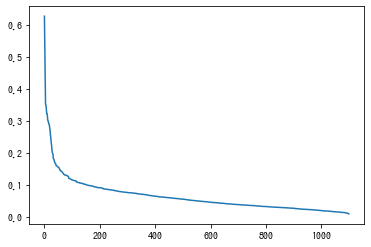

In [7]:
from sklearn.neighbors import NearestNeighbors
k = 4
nbrs = NearestNeighbors(n_neighbors=k).fit(df)
distances, indices = nbrs.kneighbors(df)
distance_dec_df = sorted(distances[:,k-1], reverse=True)
plt.plot(indices[:,0], distance_dec_df)

From the above graph we can estimate that $\epsilon$ is between 0.1-0.2, taking an average value i.e $(0.1+0.2)/2=0.15$, thus $\epsilon = 0.15$(approx.)

## Using DBSCAN to cluster

In [8]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(min_samples=4, eps=0.15).fit_predict(df)


In [9]:
result = df.copy()
result['cluster'] = clusters

In [10]:
result['cluster'].value_counts()

 0    411
 1    405
 2    105
 3     99
 4     51
-1     29
Name: cluster, dtype: int64

## Visualizing the cluster results

In [11]:
# ignore if failed
try:
    import seaborn as sns
    sns.set()
except Exception as e:
    pass

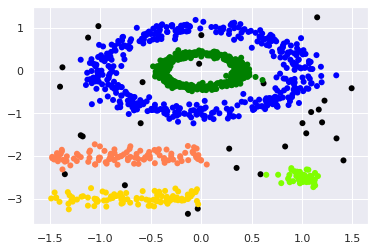

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors = ['black', 'blue', 'green', '#FF7F50', '#FFD700', '#7FFF00', '#FFD700']
for i in [-1, 0,1,2,3,4]:
    d = result.loc[result['cluster']==i]
    ax.scatter(d['x'], d['y'], c=colors[i+1],  alpha=1, edgecolors='none')


ax.grid(True)
plt.show()

In the above diagram, the data is clustered to form 5 clusters shown by the colors blue, crimson, gold, light green and drak green. The outliers are shown in black color

Thus we can conclude that using the above mentioned values of $\epsilon=0.15$ and $min\_samples=4$, found mathematically, proves the hypothesis of the ISRO scientists

## Total outliers and Cluster-wise member count

In [13]:
cluster_count = pd.DataFrame(result['cluster'].value_counts())

In [14]:
cluster_count.reset_index(inplace=True)

In [15]:
print("Total number of outliers: {}".format(result[result.cluster==-1]['cluster'].count()))
for index, row in cluster_count[cluster_count["index"]!=-1].iterrows():
    print("For cluster {0}, the number of members are {1}".format(row['index'], row['cluster']))

Total number of outliers: 29
For cluster 0, the number of members are 411
For cluster 1, the number of members are 405
For cluster 2, the number of members are 105
For cluster 3, the number of members are 99
For cluster 4, the number of members are 51
